In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
df = pd.read_pickle('../Data/Processed Data/Headphone_CleanText.pkl')

In [3]:
df = df[~df['clean_text'].isna()]

In [4]:
df = df.drop(df[(df['review_length'] > 150) 
                                           & (df['rating_class'] == 'good')
                                          ].index)

In [5]:
df.shape

(17271, 19)

In [6]:
analyser = SentimentIntensityAnalyzer()

In [7]:
def sentiment(x):
    return analyser.polarity_scores(x)

In [8]:
df['sentiment'] = df['clean_text'].apply(sentiment)

In [9]:
df2 = pd.concat([df.drop(['sentiment'], axis=1), df['sentiment'].apply(pd.Series)], axis=1)

In [10]:
df2.head(2)

,reviewerID,asin,helpful,overall,reviewTime,category,description,title,brand,feature,...,review_summary,rating_class,year,clean_text,rating_class_num,review_length,neg,neu,pos,compound
1140,A22KW5YWAI5YDO,B000001OMI,"[0, 0]",4.0,2013-11-24,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...",...,Good headphones. I like (very much) that the...,good,2013,good headphones like much wire one side lightw...,1,112,0.000,0.449,0.551,0.9287
1141,A2FUMBORC5EMXG,B000001OMI,"[0, 0]",5.0,2014-03-10,"[Electronics, Headphones, On-Ear Headphones]",[The stylish HP200S Stereo Line silver headpho...,Maxell 190318 Lightweight Adjustable Open Air ...,Maxell,"[Lightweight, Open-air Headphones, Ideal For A...",...,My job involves wearing earphones ALL THE TIME...,good,2014,job involve wear earphones time tight ears get...,1,140,0.091,0.657,0.252,0.6590


---
Check the sentiments for a sample good and bad review:

In [11]:
#Check the sentiments for a sample review
df.loc[1140]['overall']

4.0

In [12]:
df.loc[1140]['sentiment']

{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.9287}

In [13]:
df.loc[1140]['review_summary']

'Good  headphones.  I like (very much) that they only have a wire on one side  and they are lightweight..The sound is pretty good. I enjoy using them.Light, one wire, headphones...'

In [14]:
df.loc[147330]['overall']

1.0

In [15]:
df.loc[147330]['sentiment']

{'neg': 0.275, 'neu': 0.725, 'pos': 0.0, 'compound': -0.6496}

In [16]:
df.loc[147330]['review_summary']

"They aren't very comfortable, are flimsy, and anyone within 100 feet will hear every lyric of your music without it being loud.Lacks bass too.They kinda suck"

---
Plot avg sentiments per rating: 

In [17]:
ratings = (df2.groupby('overall',as_index=False)['compound']
           .mean()
           .sort_values('overall', ascending = False))
ratings.rename({'overall':'Rating', 'compound':'Sentiment' }, inplace=True, axis=1)
ratings.index=[5,4,3,2,1]

ratings

,Rating,Sentiment
5,5.0,0.631771
4,4.0,0.531195
3,3.0,0.260090
2,2.0,0.248524
1,1.0,0.015100


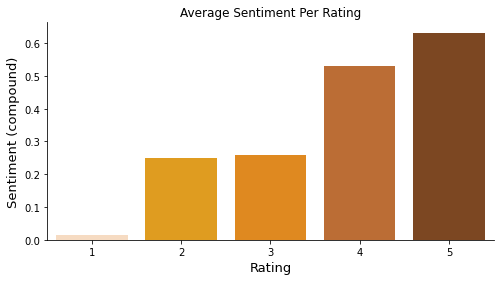

In [18]:
plt.figure(figsize = (8,4))
mycolors =['peachpuff', 'orange', 'darkorange', 'chocolate', 'saddlebrown']  

sns.barplot(x='Rating', y='Sentiment', data = ratings,  palette= mycolors, order=[1,2,3,4,5])

sns.despine()
plt.title('Average Sentiment Per Rating')
plt.xlabel('Rating', fontsize = 13)
plt.ylabel('Sentiment (compound)', fontsize = 13);

plt.savefig('../Images/Average_Sentiment_Per_Rating.jpg')

---
Plot sentiments over time: 

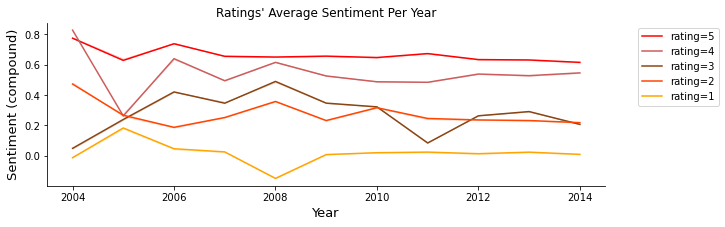

In [49]:
df2=df2[df2['year']>2003]

plt.figure(figsize=(10,3))

sns.lineplot(x='year', y= 'compound', data = df2[df2['overall']==5], 
             ci=0, label='rating=5', color='red')

sns.lineplot(x='year', y= 'compound', data = df2[df2['overall']==4], 
             ci=0, label='rating=4', color='indianred')

sns.lineplot(x='year', y= 'compound', data = df2[df2['overall']==3], 
             ci=0, label='rating=3', color='saddlebrown')

sns.lineplot(x='year', y= 'compound', data = df2[df2['overall']==2], 
             ci=0, label='rating=2', color='orangered')

sns.lineplot(x='year', y= 'compound', data = df2[df2['overall']==1], 
             ci=0, label='rating=1', color='orange')

plt.legend(bbox_to_anchor=(1.05, 1))

sns.despine()
plt.title("Ratings' Average Sentiment Per Year")
plt.xlabel('Year', fontsize = 13)
plt.ylabel("Sentiment (compound)", fontsize = 13)

plt.savefig("../Images/Ratings'_Average_Sentiment_Per_Year.jpg", bbox_inches='tight');

#mycolors =['saddlebrown', 'sienna','chocolate', 'darkorange', 'orange']  


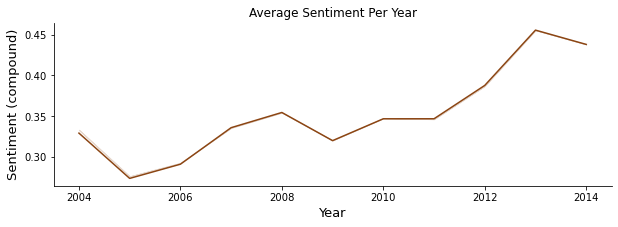

In [50]:
plt.figure(figsize=(10,3))
sns.lineplot(x='year', y= 'compound', 
             data = df2, ci=0,  color='saddlebrown')

sns.despine()
plt.title("Average Sentiment Per Year")
plt.xlabel('Year', fontsize = 13)
plt.ylabel("Sentiment (compound)", fontsize = 13)

plt.savefig("../Images/Average_Sentiment_Per_Year.jpg", bbox_inches='tight');